In [10]:
# importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sktime.performance_metrics.forecasting import MeanSquaredError, MeanAbsolutePercentageError, MeanAbsoluteScaledError, MeanSquaredScaledError
from math import sqrt, ceil, floor

In [11]:
# Leer train y test
train = pd.read_csv('../Data/train.csv')
test = pd.read_csv('../Data/test.csv')

In [12]:
train['idSecuencia'] = pd.to_datetime(train['idSecuencia'])
test['idSecuencia'] = pd.to_datetime(test['idSecuencia'])

In [13]:
train_mean = train.groupby(['idSku'])['udsVenta'].mean().reset_index()
train_mean.rename(columns={'udsVenta': 'mean'}, inplace=True)
train_mean['mean'] = train_mean['mean'].apply(lambda x: round(x))

train_mean

,idSku,mean
0,1,14
1,2,17
2,3,10
3,4,9
4,5,11
5,6,10
6,7,9
7,8,6
8,9,6
9,10,6


In [14]:
test = test[['idSku', 'idSecuencia', 'bolHoliday', 'udsVenta']]
test = pd.merge(test, train_mean, on='idSku', how='left')
test.rename(columns={'mean': 'udsVenta_pred'}, inplace=True)
test.head()

,idSku,idSecuencia,bolHoliday,udsVenta,udsVenta_pred
0,1,2021-11-07,1,0,14
1,1,2021-11-08,0,27,14
2,1,2021-11-09,0,9,14
3,1,2021-11-10,0,0,14
4,1,2021-11-11,0,9,14


In [15]:
results = pd.DataFrame(columns=['idSku', 'target', 'prediction'])

skus = train['idSku'].unique()

for s in skus:

    df_sku = test[test['idSku'] == s]
    prediction = df_sku['udsVenta_pred'].tolist()
    target= df_sku['udsVenta'].tolist()

    # create a list with idSku, target and prediction
    r = pd.DataFrame([s, target, prediction]).T
    r.columns = ['idSku', 'target', 'prediction']
    results = results.append(r, ignore_index=True)

C:\Users\96gar\AppData\Local\Temp\ipykernel_14724\1580938945.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(r, ignore_index=True)
C:\Users\96gar\AppData\Local\Temp\ipykernel_14724\1580938945.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(r, ignore_index=True)
C:\Users\96gar\AppData\Local\Temp\ipykernel_14724\1580938945.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(r, ignore_index=True)
C:\Users\96gar\AppData\Local\Temp\ipykernel_14724\1580938945.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(r, ignore_index=True)


In [16]:
results

,idSku,target,prediction
0,1,"[0, 27, 9, 0, 9, 6, 24, 0, 27, 3, 9, 6, 18, 27...","[14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 1..."
1,2,"[0, 21, 6, 12, 12, 9, 33, 0, 18, 30, 21, 15, 1...","[17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 1..."
2,3,"[0, 9, 9, 3, 9, 15, 12, 0, 9, 9, 18, 0, 6, 27,...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1..."
3,4,"[0, 0, 9, 6, 9, 18, 12, 0, 6, 6, 6, 3, 6, 12, ...","[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ..."
4,5,"[0, 0, 0, 0, 0, 0, 0, 0, 6, 3, 0, 0, 3, 3, 0, ...","[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1..."
5,6,"[0, 9, 6, 3, 0, 6, 9, 0, 6, 12, 6, 3, 9, 15, 0...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1..."
6,7,"[0, 6, 15, 9, 9, 12, 3, 0, 9, 9, 15, 3, 6, 0, ...","[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ..."
7,8,"[0, 4, 8, 12, 8, 4, 8, 0, 4, 0, 6, 8, 15, 6, 0...","[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ..."
8,9,"[0, 3, 0, 21, 24, 12, 9, 3, 24, 12, 9, 18, 15,...","[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ..."
9,10,"[0, 7, 9, 12, 12, 3, 18, 6, 3, 3, 9, 9, 6, 0, ...","[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ..."


In [17]:
# RMSE: Root Mean Squared Error
# MAPE: Mean Absolute Percentage Error
# MASE: Mean Absolute Scaled Error
# SMAPE: Symmetric Mean Absolute Percentage Error
# RMSSE: Root Mean Squared Scaled Error

results['RMSE'] = np.nan
results['MAPE'] = np.nan
results['MASE'] = np.nan
results['SMAPE'] = np.nan
results['RMSSE'] = np.nan

rmse = MeanSquaredError(square_root=True)
mape = MeanAbsolutePercentageError()
mase = MeanAbsoluteScaledError()
smape = MeanAbsolutePercentageError(symmetric=True)
rmsse = MeanSquaredScaledError(square_root=True)

# calculate rmse for each sku and append to results dataframe
for i in range(0, 50):
    t = pd.Series(results['target'][i])
    p = pd.Series(results['prediction'][i])
    y_train = train[train['idSku'] == i+1]['udsVenta']
    results['RMSE'][i] = rmse(t, p)
    results['MAPE'][i] = mape(t, p)
    results['MASE'][i] = mase(t, p, y_train=y_train)
    results['SMAPE'][i] = smape(t, p)
    results['RMSSE'][i] = rmsse(t, p, y_train=y_train)
results

C:\Users\96gar\AppData\Local\Temp\ipykernel_14724\2379025414.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['RMSE'][i] = rmse(t, p)
C:\Users\96gar\AppData\Local\Temp\ipykernel_14724\2379025414.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['MAPE'][i] = mape(t, p)
C:\Users\96gar\AppData\Local\Temp\ipykernel_14724\2379025414.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['MASE'][i] = mase(t, p, y

,idSku,target,prediction,RMSE,MAPE,MASE,SMAPE,RMSSE
0,1,"[0, 27, 9, 0, 9, 6, 24, 0, 27, 3, 9, 6, 18, 27...","[14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 1...",10.024969,1.083679e+16,0.715188,0.695490,0.693412
1,2,"[0, 21, 6, 12, 12, 9, 33, 0, 18, 30, 21, 15, 1...","[17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 1...",10.631616,1.315896e+16,0.678119,0.729172,0.616275
2,3,"[0, 9, 9, 3, 9, 15, 12, 0, 9, 9, 18, 0, 6, 27,...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...",6.955775,1.055531e+16,0.654400,0.805330,0.608095
3,4,"[0, 0, 9, 6, 9, 18, 12, 0, 6, 6, 6, 3, 6, 12, ...","[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ...",6.204207,1.044976e+16,0.640812,0.827632,0.599242
4,5,"[0, 0, 0, 0, 0, 0, 0, 0, 6, 3, 0, 0, 3, 3, 0, ...","[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1...",9.070901,1.199787e+16,0.783428,0.866230,0.716469
5,6,"[0, 9, 6, 3, 0, 6, 9, 0, 6, 12, 6, 3, 9, 15, 0...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...",8.269390,1.020347e+16,0.684078,0.798989,0.670627
6,7,"[0, 6, 15, 9, 9, 12, 3, 0, 9, 9, 15, 3, 6, 0, ...","[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ...",6.302901,8.866462e+15,0.692426,0.758708,0.691439
7,8,"[0, 4, 8, 12, 8, 4, 8, 0, 4, 0, 6, 8, 15, 6, 0...","[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...",5.817538,8.866462e+15,0.829376,0.996168,0.764439
8,9,"[0, 3, 0, 21, 24, 12, 9, 3, 24, 12, 9, 18, 15,...","[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...",9.463334,2.111062e+15,1.268960,0.765400,1.211186
9,10,"[0, 7, 9, 12, 12, 3, 18, 6, 3, 3, 9, 9, 6, 0, ...","[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...",4.398153,7.177612e+15,0.632314,0.841157,0.612206


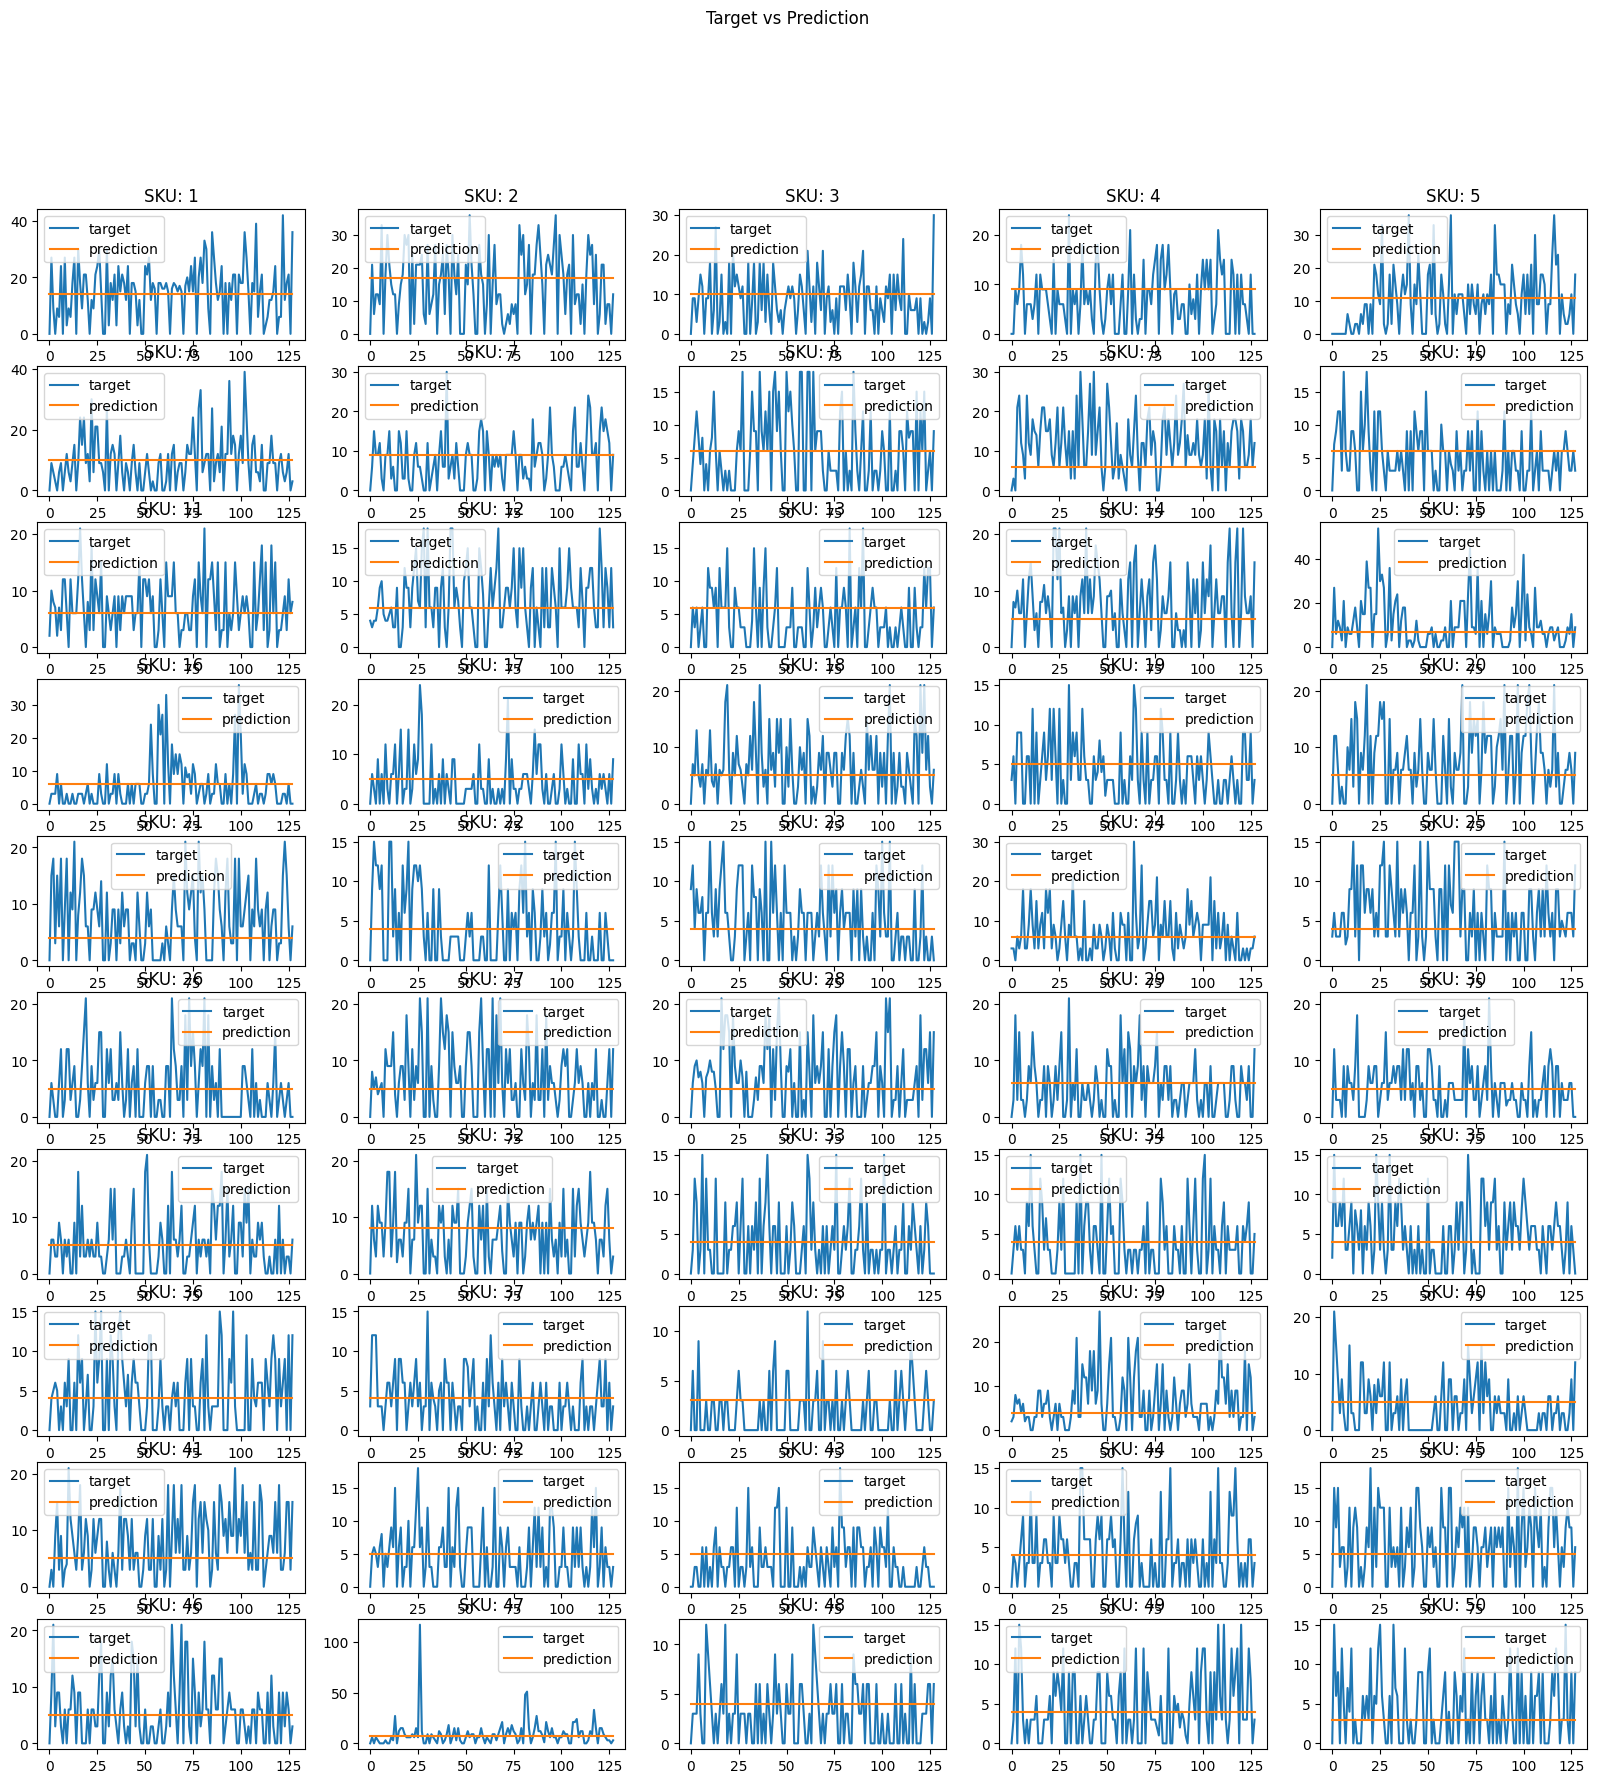

In [18]:
# make 50 subplots in a 10x5 grid and plot the target and prediction
fig, axs = plt.subplots(10, 5, figsize=(20, 20))
fig.suptitle('Target vs Prediction')
for i in range(10):
    for j in range(5):
        axs[i, j].plot(results['target'][i*5+j], label='target')
        axs[i, j].plot(results['prediction'][i*5+j], label='prediction')
        axs[i, j].legend()
        axs[i, j].set_title('SKU: ' + str(i*5+j+1))
plt.show()

In [19]:
# get the metrics of the results dataframe
metrics = results[['RMSE', 'MAPE', 'MASE', 'SMAPE', 'RMSSE']]

# get the mean of each metric
metrics_mean = metrics.mean()
metrics_mean

RMSE     5.876439e+00
MAPE     6.879248e+15
MASE     8.197725e-01
SMAPE    9.330202e-01
RMSSE    7.760668e-01
dtype: float64